# view 1t and 5 kt coeff

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
import os, sys
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import curve_fit

# 1t coeff
#### pe

In [6]:
# fit odd order, even order is 0
def odd_func(x, a, b, c, d, e):
    return a * x**1 + b * x**3 + c * x**5 + d * x**7 + e * x**9
# fit even order, even order is 0
def even_func(x, a, b, c, d, e):
    return a * x**0 + b * x**2 + c * x**4 + d * x**6 + e * x**8
# load data
def LoadDataPE(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    h.close()
    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    return data


def LoadFileTime(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)   
    data = eval('np.array(h.root.'+ coeff + '[:])')
    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    h.close()
    return data

In [14]:
# fit odd order, even order is 0
def odd_func(x, a, b, c, d, e, f, g, h, i, j):
    return a * x**1 + b * x**3 + c * x**5 + d * x**7 + e * x**9 + f * x**11 + g * x**13 + h * x**15 + i*x**17 + j*x**19
# fit even order, even order is 0
def even_func(x, a, b, c, d, e, f, g, h, i, j):
    return a * x**0 + b * x**2 + c * x**4 + d * x**6 + e * x**8 + f * x**10 + g * x**12 + h * x**14 + i*x**16 + j*x**18
# load data
def LoadDataPE(path, radius, order,axis):
    data = []
    filename = path + 'file_' + radius + '+' + axis + '.h5'
    print(filename)
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    h.close()
    return data


def LoadFileTime(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')

    coeff = 'coeff' + str(order)
    
    data = eval('np.array(h.root.'+ coeff + '[:])')

    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    return data

../coeff_pe_1t_2.0MeV_dns_single_x/file_0.010+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.020+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.030+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.040+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.050+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.060+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.070+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.080+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.090+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.100+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.110+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.120+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.130+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.140+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.150+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.160+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.170+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.180+x.h5
../coeff_pe_1t_2.0MeV_dns_single_x/file_0.190+x.h5
../coeff_pe_1t_2.0MeV_dns_singl

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2200.

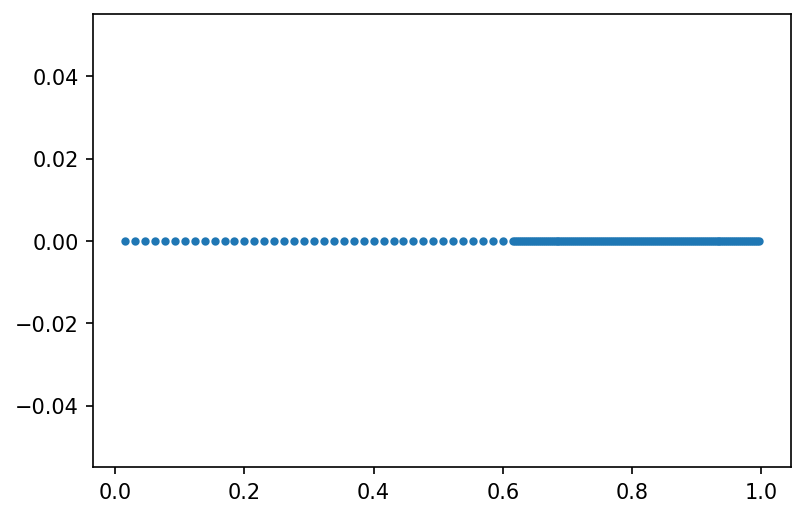

In [15]:
## gather the data
path = '../coeff_pe_1t_2.0MeV_dns_single_x/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.65, 0.002)))

order = 15
coeff_pe = []
rd = []
axis='x'
for radius in ra:
    str_radius = '%.3f' % radius
    k = LoadDataPE(path, str_radius, order, axis)
    rd.append(np.array(radius))
    coeff_pe = np.hstack((coeff_pe, k))


coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')

print(coeff_pe[:,0].shape)

for i in np.arange(np.size(coeff_pe[:,0])):
    plt.figure(dpi=150)
    
    # segmented
    bd_1 = 0.85
    bd_2l = 0.50 
    bd_2r = 0.80
    bd_3 = 0.83
    
    fit_max = 5
    data = np.nan_to_num(coeff_pe[i,:])
    x = ra/0.65
    plt.plot(x, data,'.')

    index1 = (x<=bd_1) & (x>=-bd_1) & (x!=0)

    if(i%2==1):
        popt1, pcov = curve_fit(odd_func, x[index1], data[index1])
        output1 = odd_func(x[index1], *popt1)
    else:
        popt1, pcov = curve_fit(even_func, x[index1], data[index1])
        output1 = even_func(x[index1], *popt1)

    index2 = (np.abs(x)<=bd_2r) & (np.abs(x)>=bd_2l)
    if(i%2==1):
        popt2, pcov = curve_fit(odd_func, x[index2], data[index2])
        output2 = odd_func(x[index2], *popt2)
        #plt.plot(x[index1], odd_func(x[index1], *popt), 'r-')
    else:
        popt2, pcov = curve_fit(even_func, x[index2], data[index2])
        #plt.plot(x[index1], even_func(x[index1], *popt), 'r-')
        output2 = even_func(x[index2], *popt2)
    
    index3 = (x >= bd_3) | (x <= - bd_3)
    if(i%2==1):
        popt3, pcov = curve_fit(odd_func, x[index3], data[index3])
        output3 = odd_func(x[index3], *popt3)
    else:
        popt3, pcov = curve_fit(even_func, x[index3], data[index3])
        output3 = even_func(x[index3], *popt3)

    #x_total = np.hstack((x[index1],x[index2],x[index3]))
    #y_total = np.hstack((output1,output2,output3))
    #x_total = np.hstack((x[index1],x[index3]))
    #y_total = np.hstack((output1,output3))
    #index = np.argsort(x_total)

    plt.plot(x[index1],output1)
    plt.plot(x[index3][x[index3]>0],output3[x[index3]>0], color='g')
    plt.plot(x[index3][x[index3]<0],output3[x[index3]<0], color='g')  
    #plt.text(0,0.5,r'fit: z^1=%2.3f, z^3=%2.3f, z^5=%2.3f, z^7=%2.3f, z^9=%2.3f' % tuple(popt))
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit_inner','fit_outer'])
    plt.savefig('./fig_view/PE_%d-th Legendre coeff.pdf' % i)
    plt.show()

In [30]:
def single_read(axis='x'):
    path = '../coeff_pe_1t_2.0MeV_dns_single'
    ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.65, 0.002)))
    order = 10
    coeff_pe = []
    rd = []
    for radius in ra:
        str_radius = '%.3f' % radius   
        data = []
        filename = path + '_' + axis + '/file_' + str_radius + '+' + axis + '.h5'
        h = tables.open_file(filename,'r')
        coeff = 'coeff' + str(order)
        data = eval('np.array(h.root.'+ coeff + '[:])')
        h.close()
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, data))
    coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
    return rd, coeff_pe
rd1, coeff1 = single_read(axis='x')
rd2, coeff2 = single_read(axis='y')
rd3, coeff3 = single_read(axis='z')


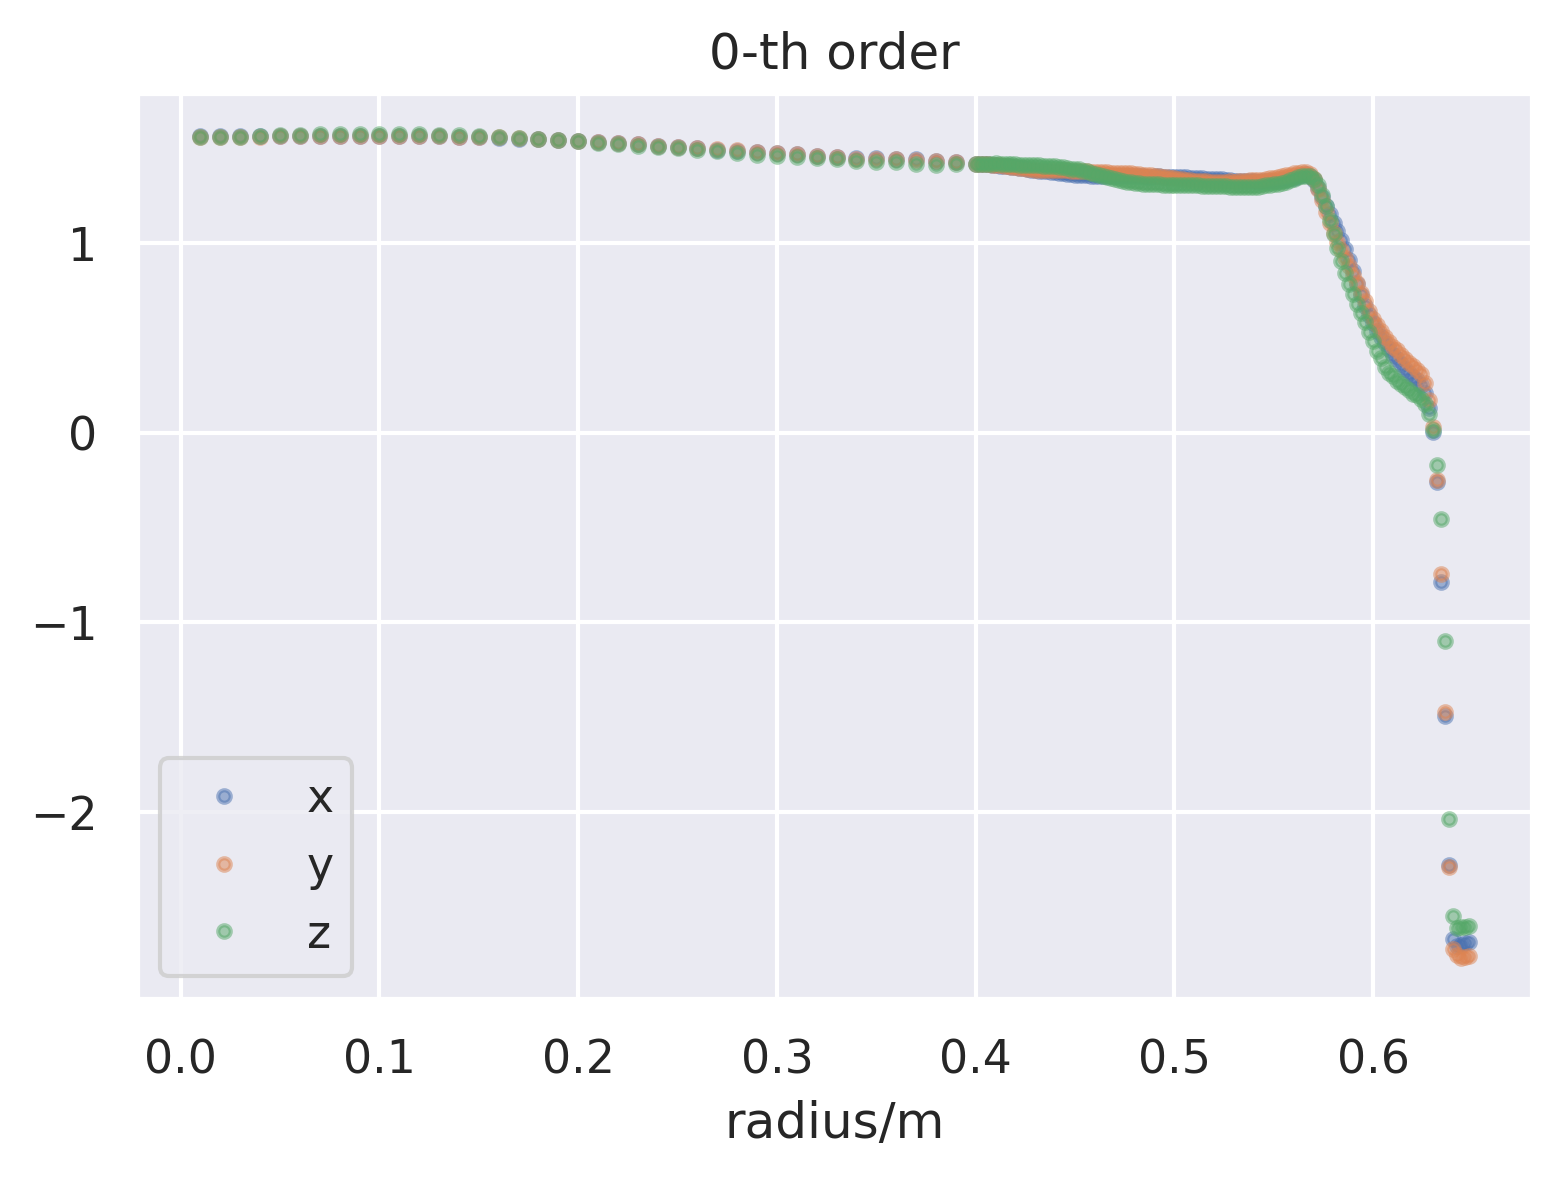

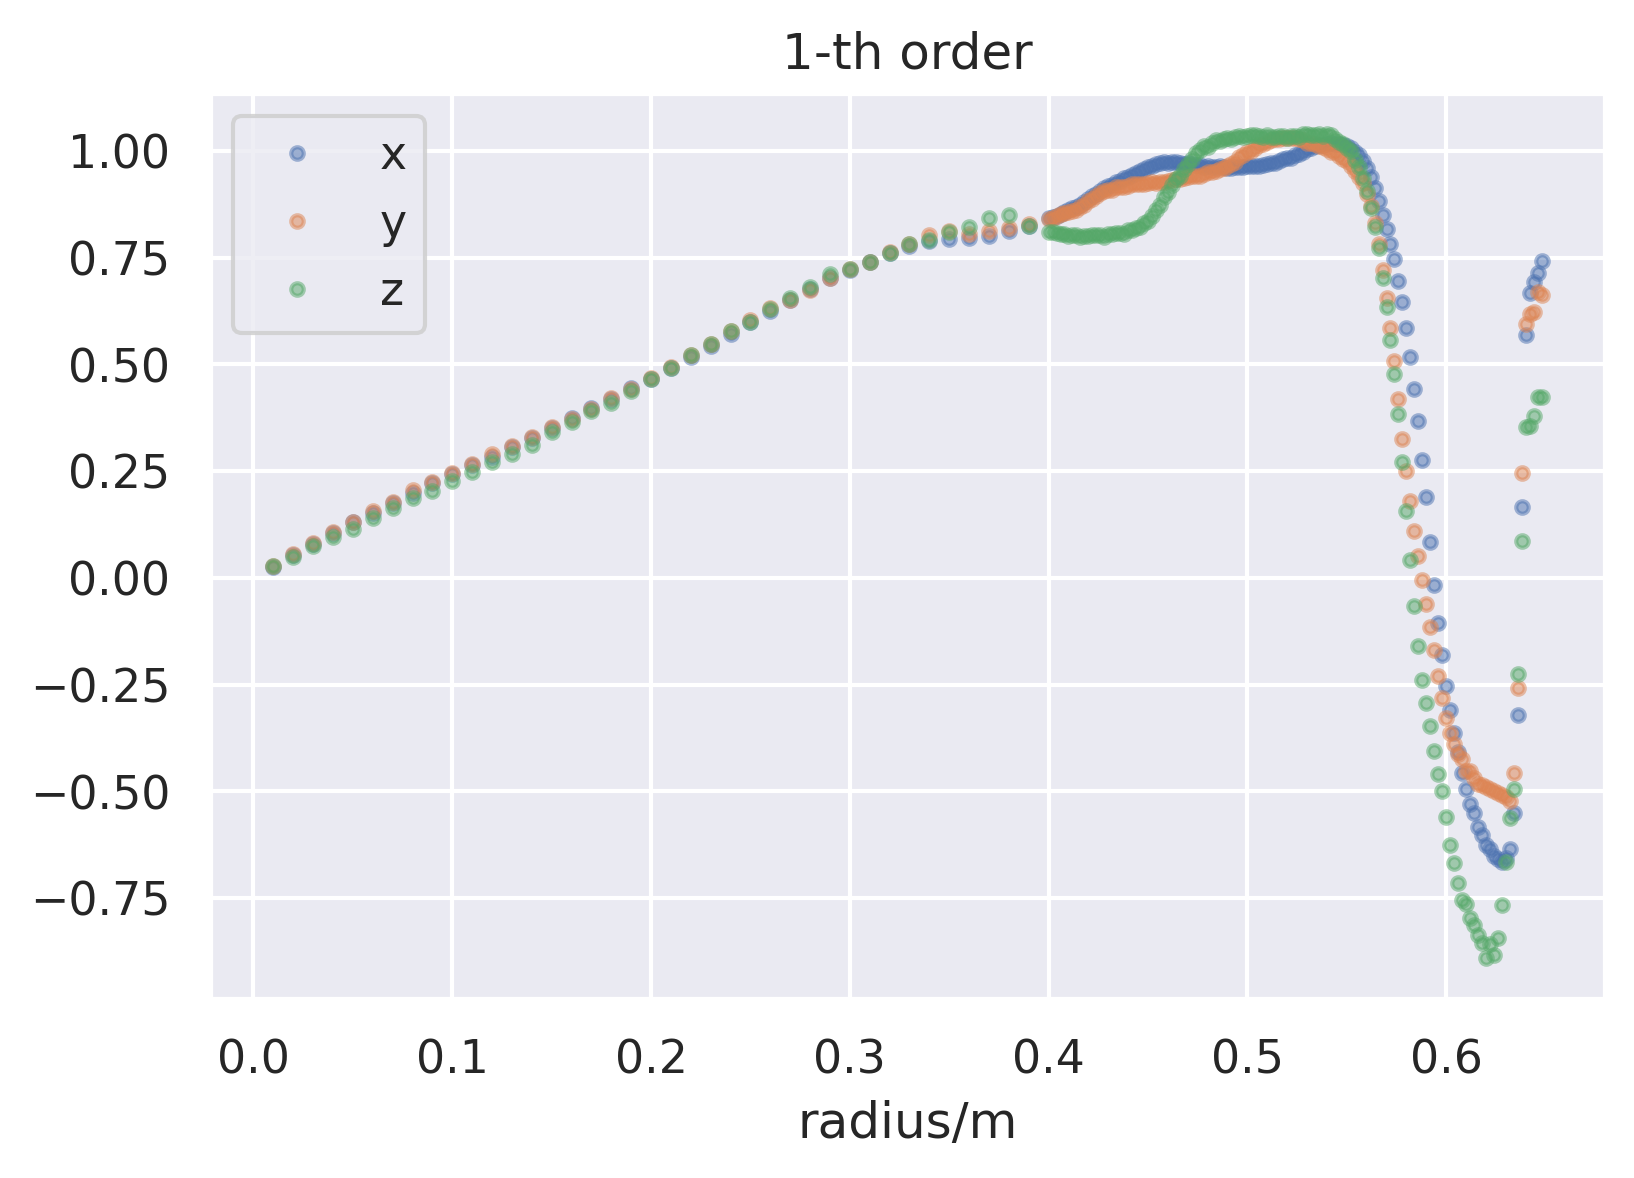

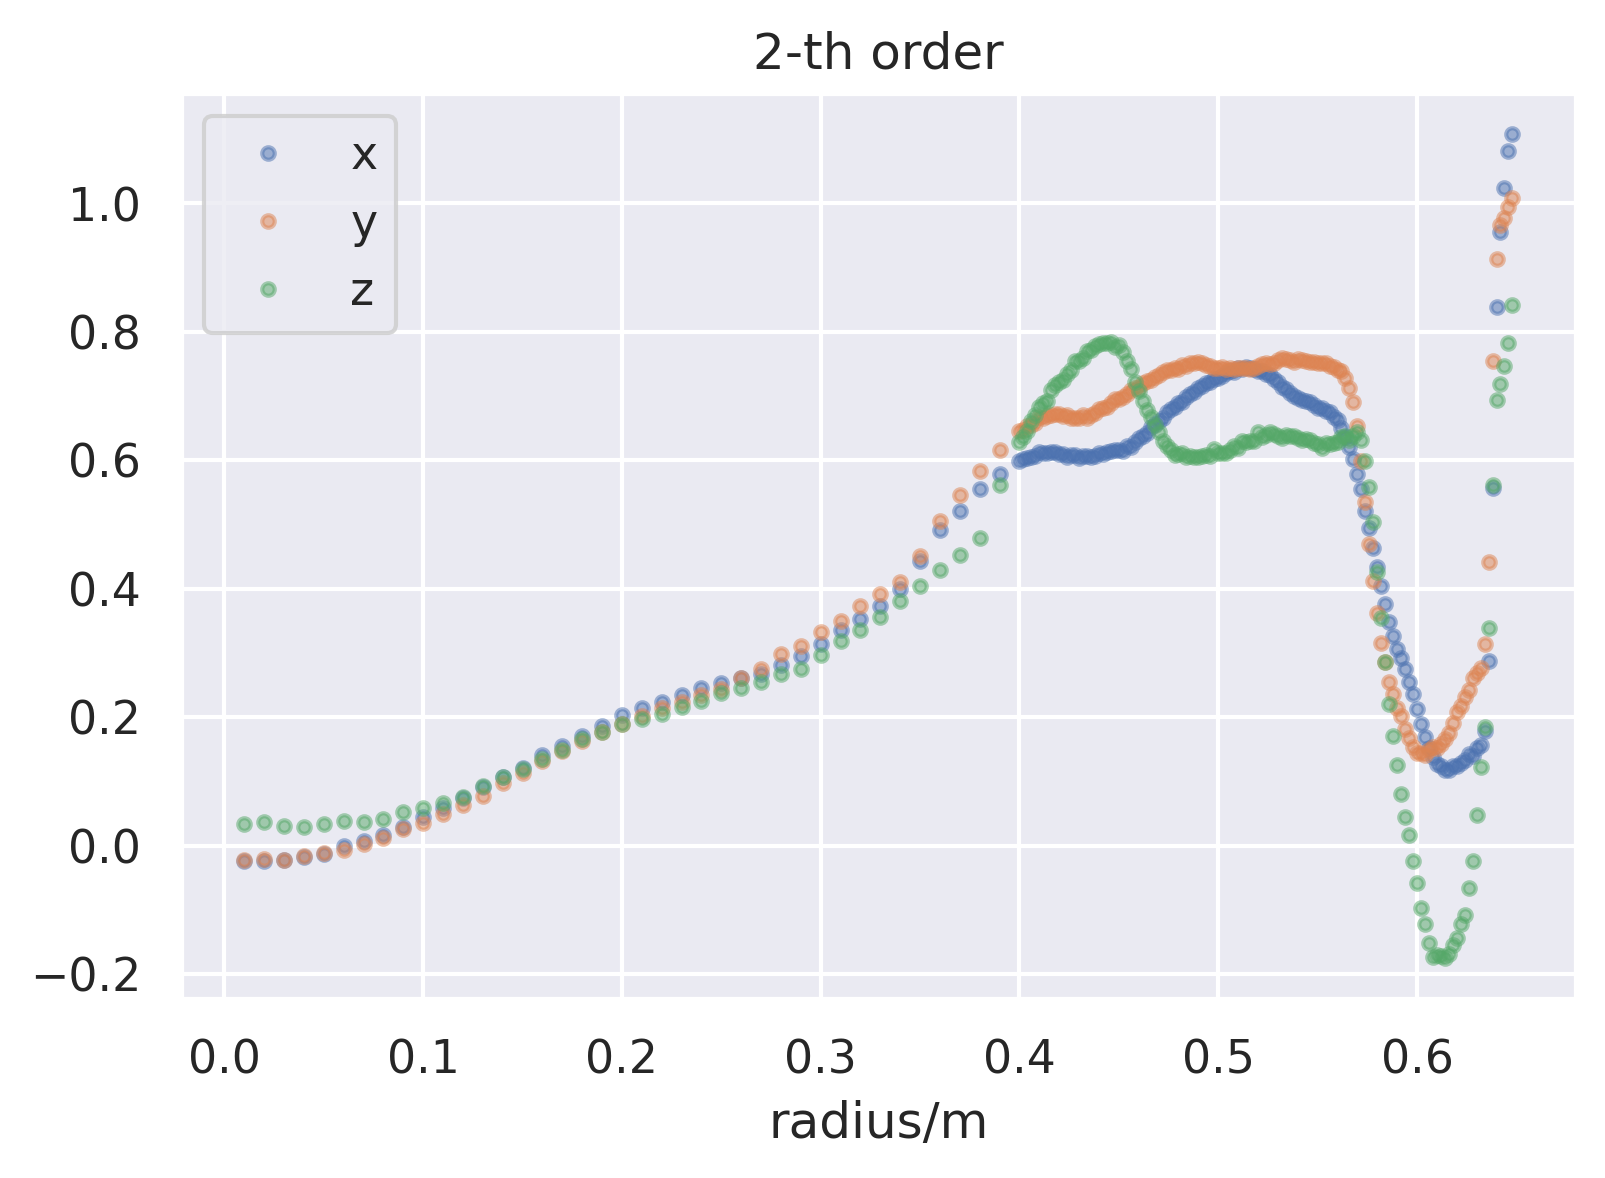

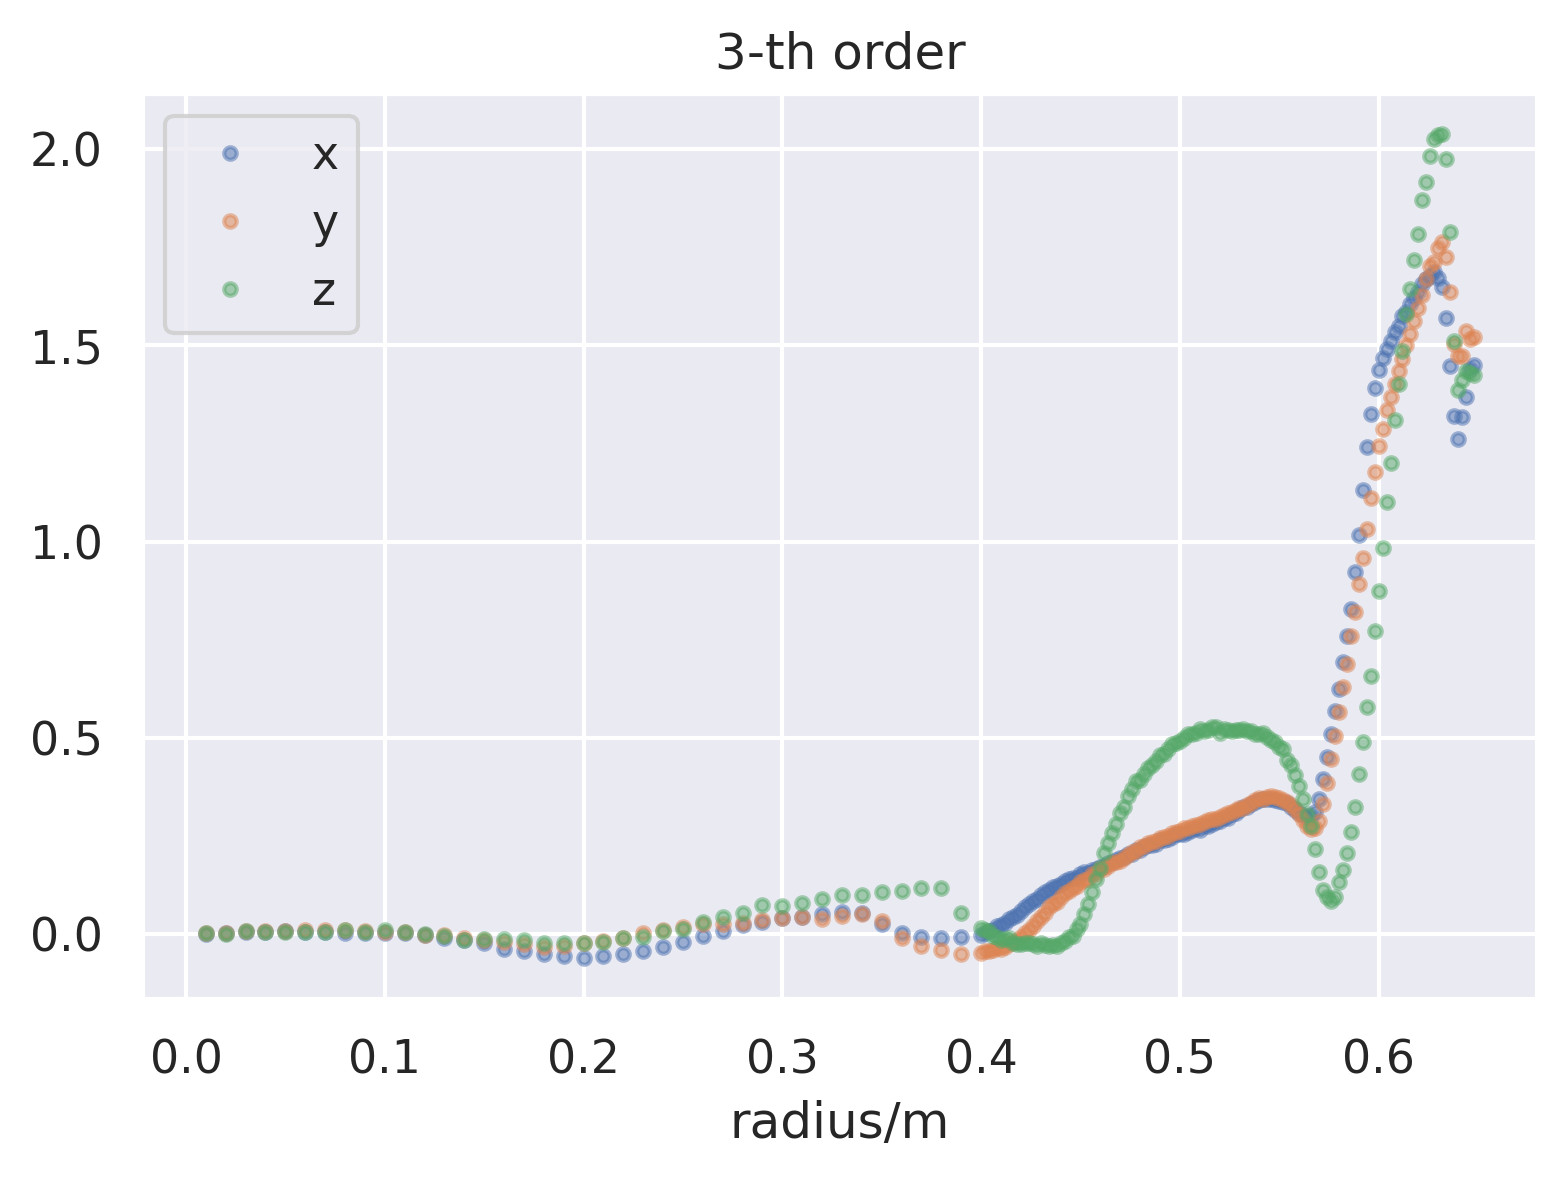

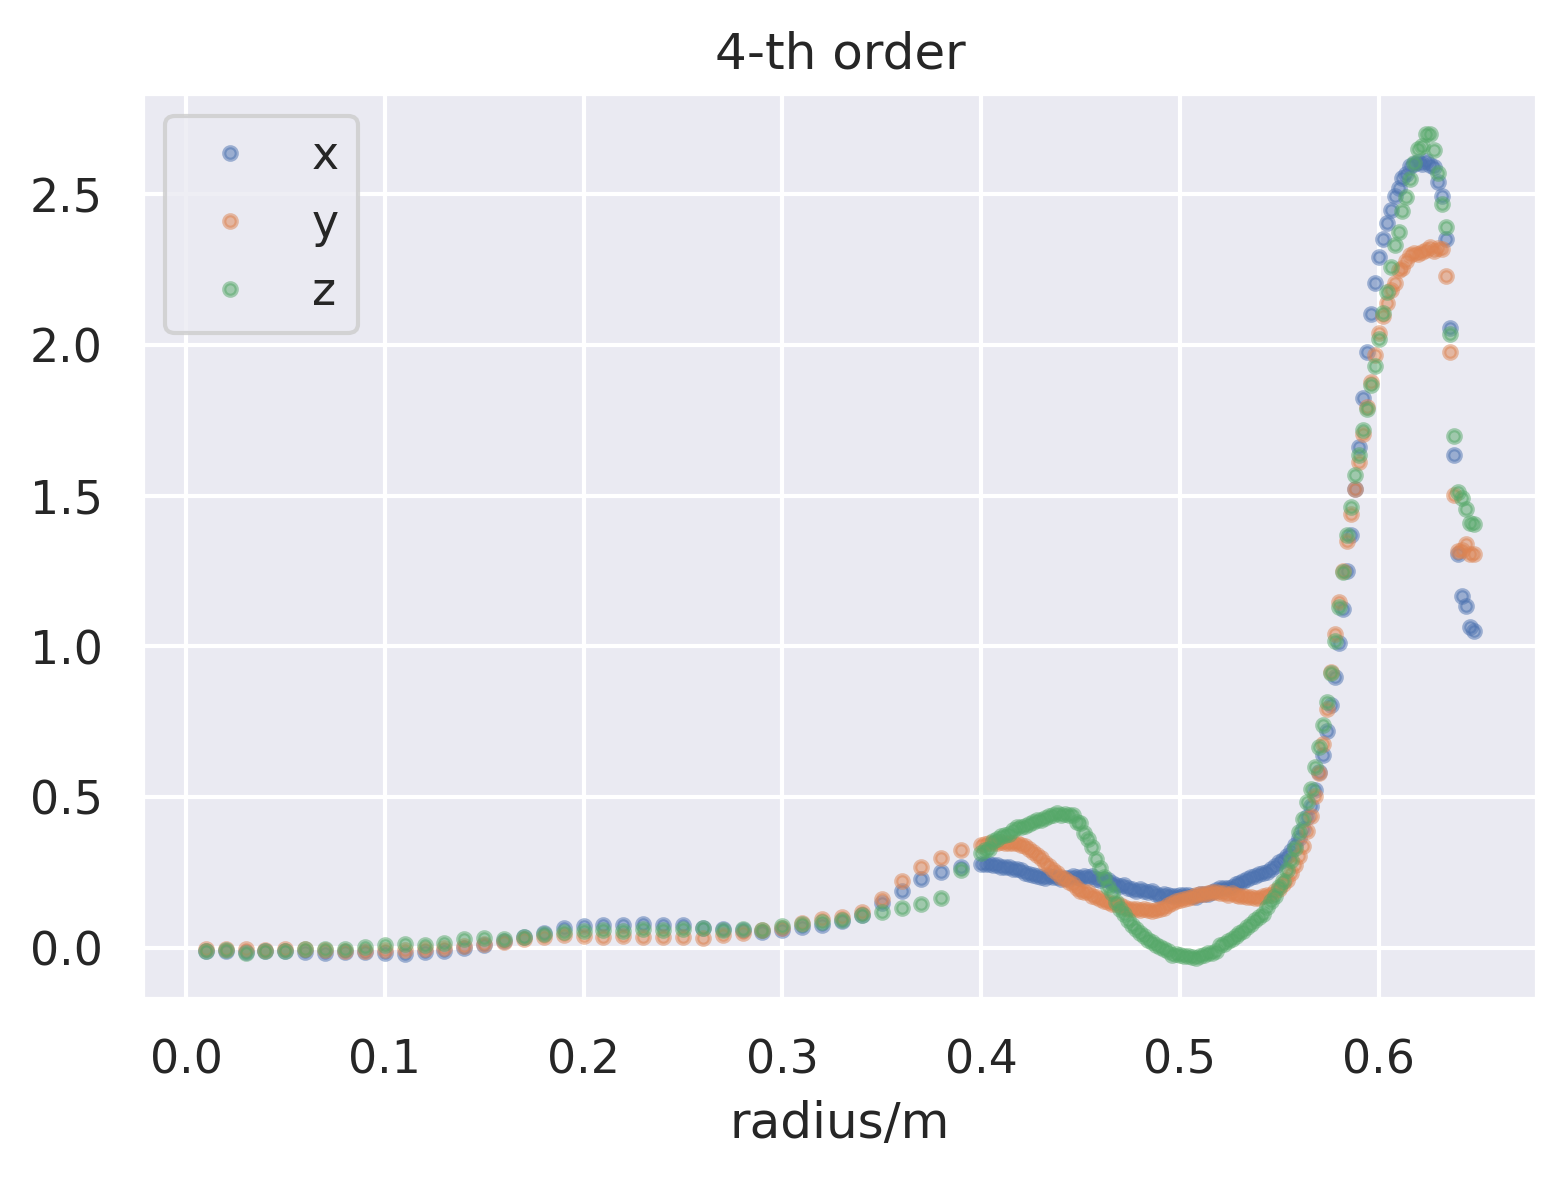

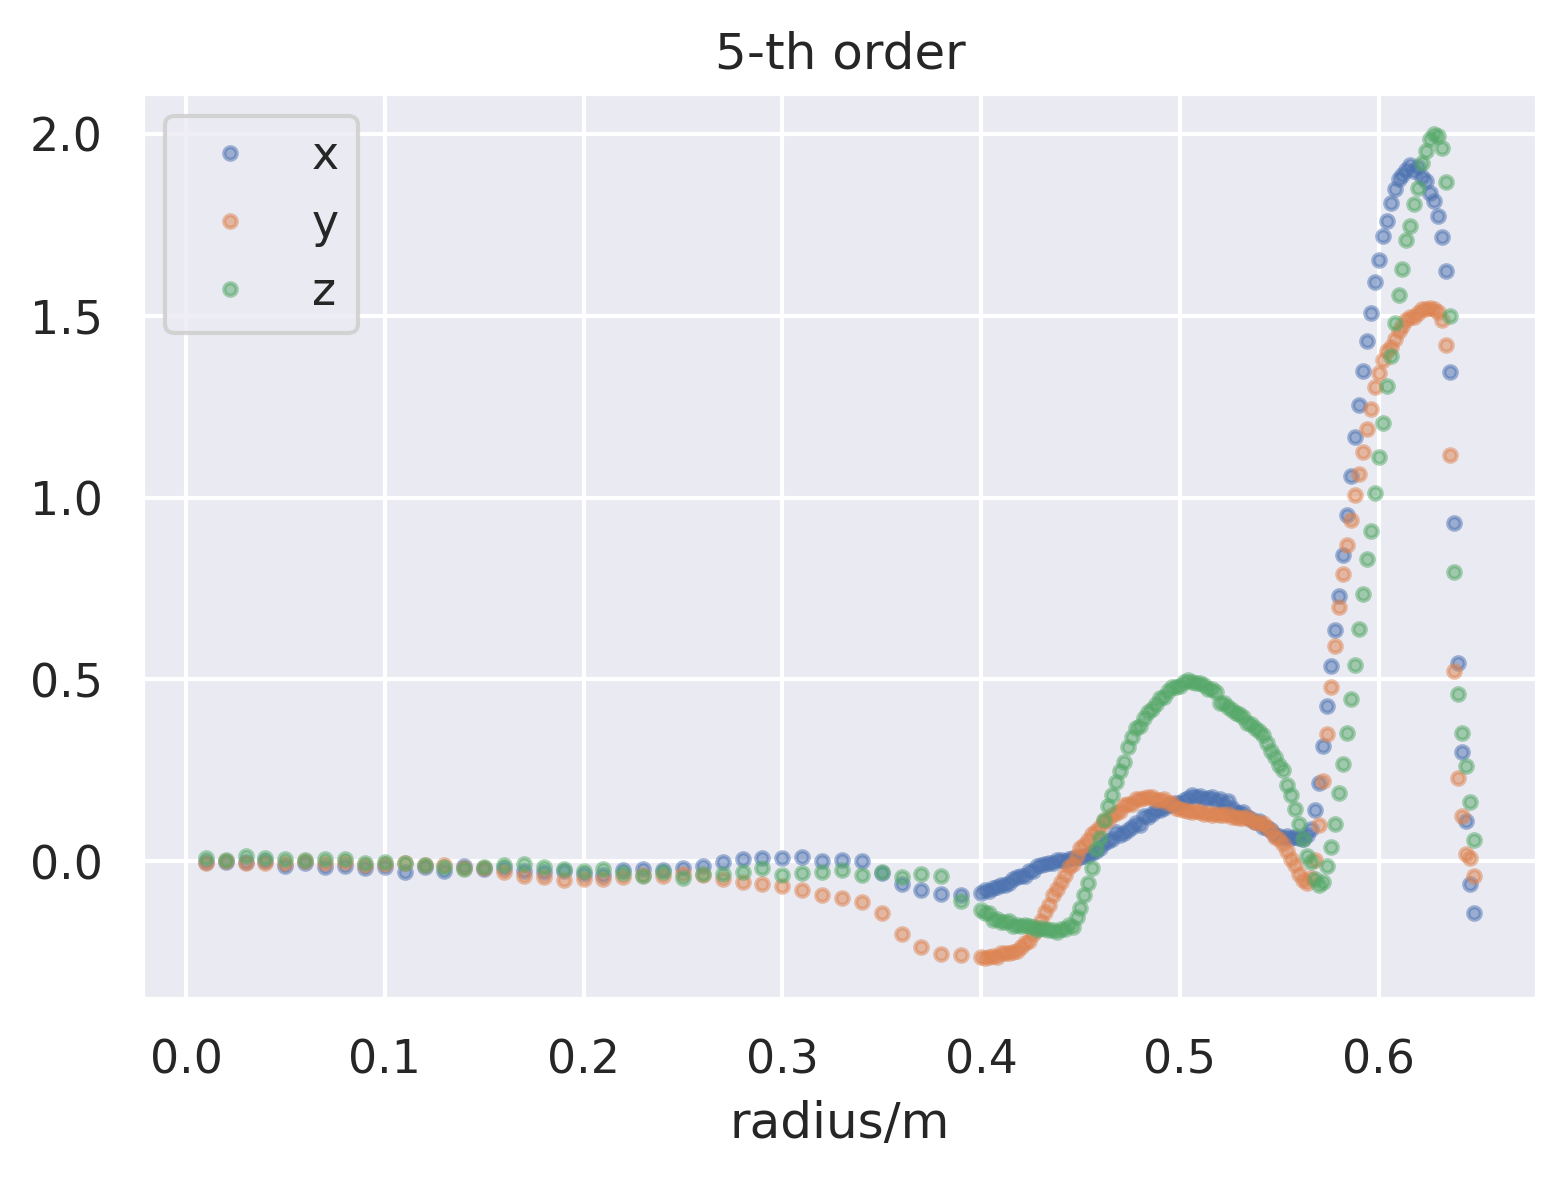

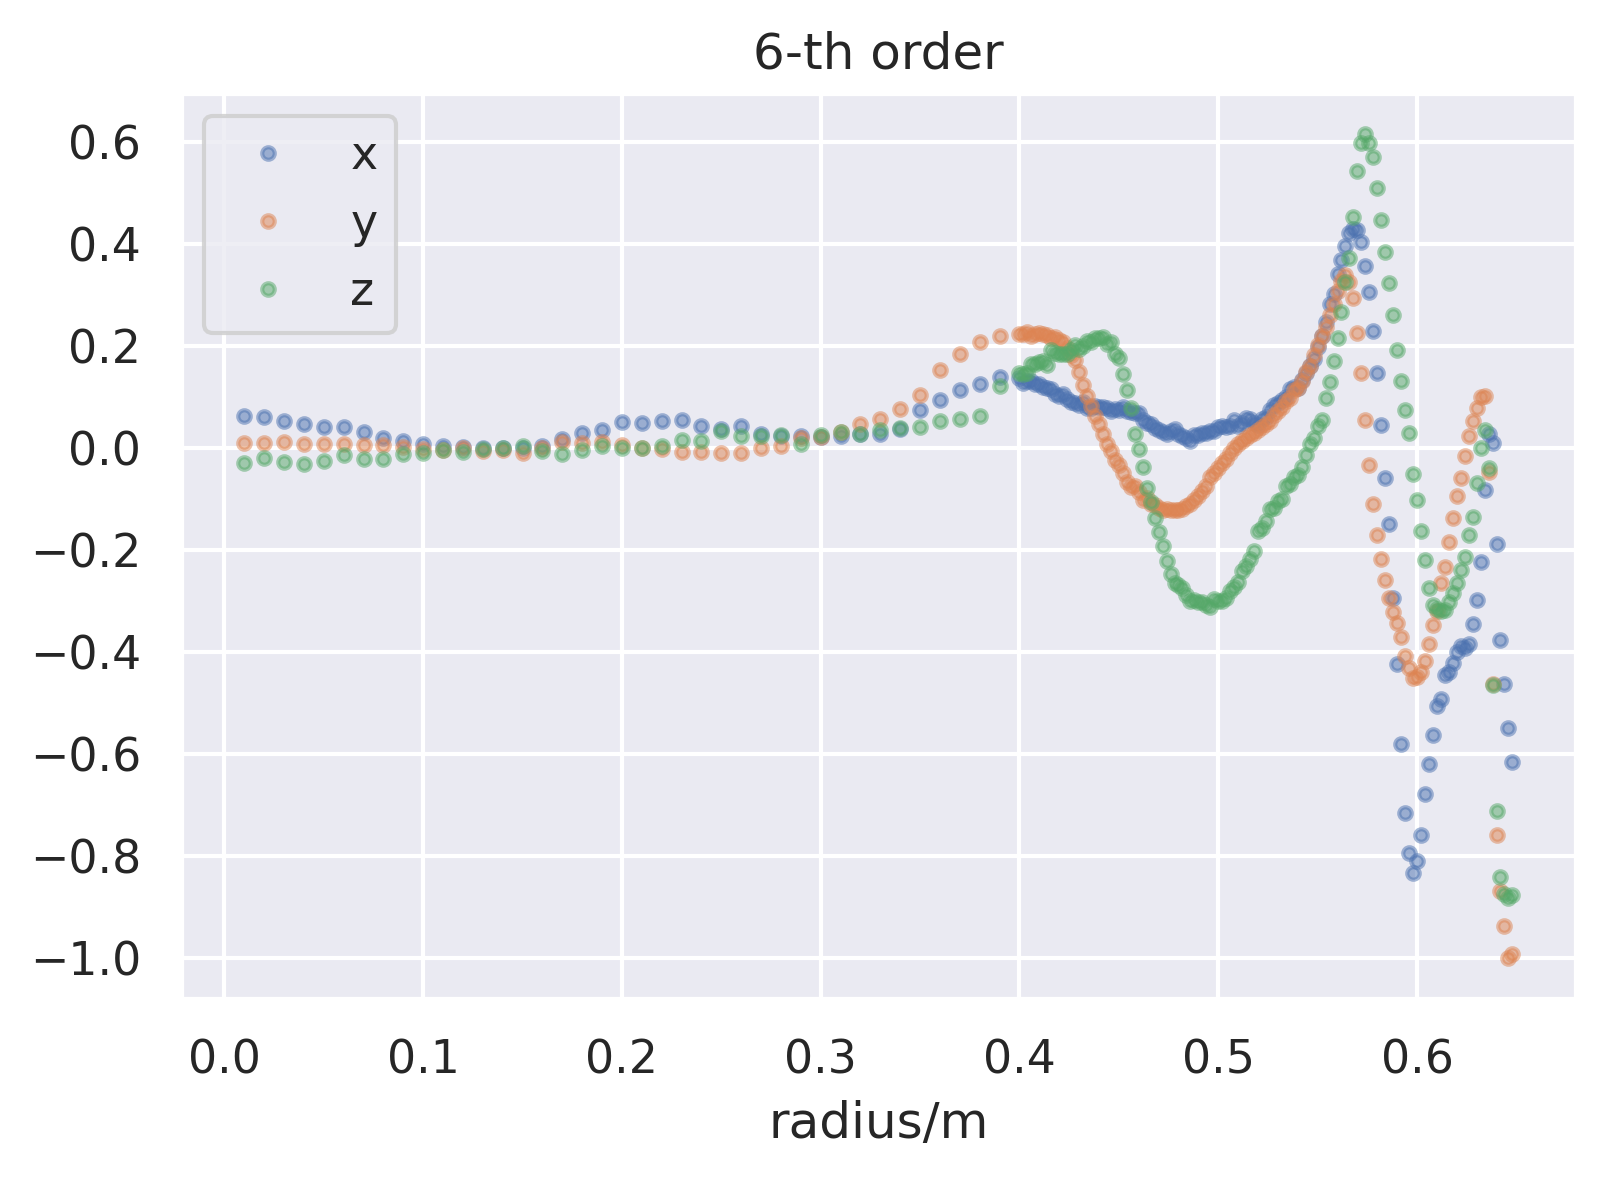

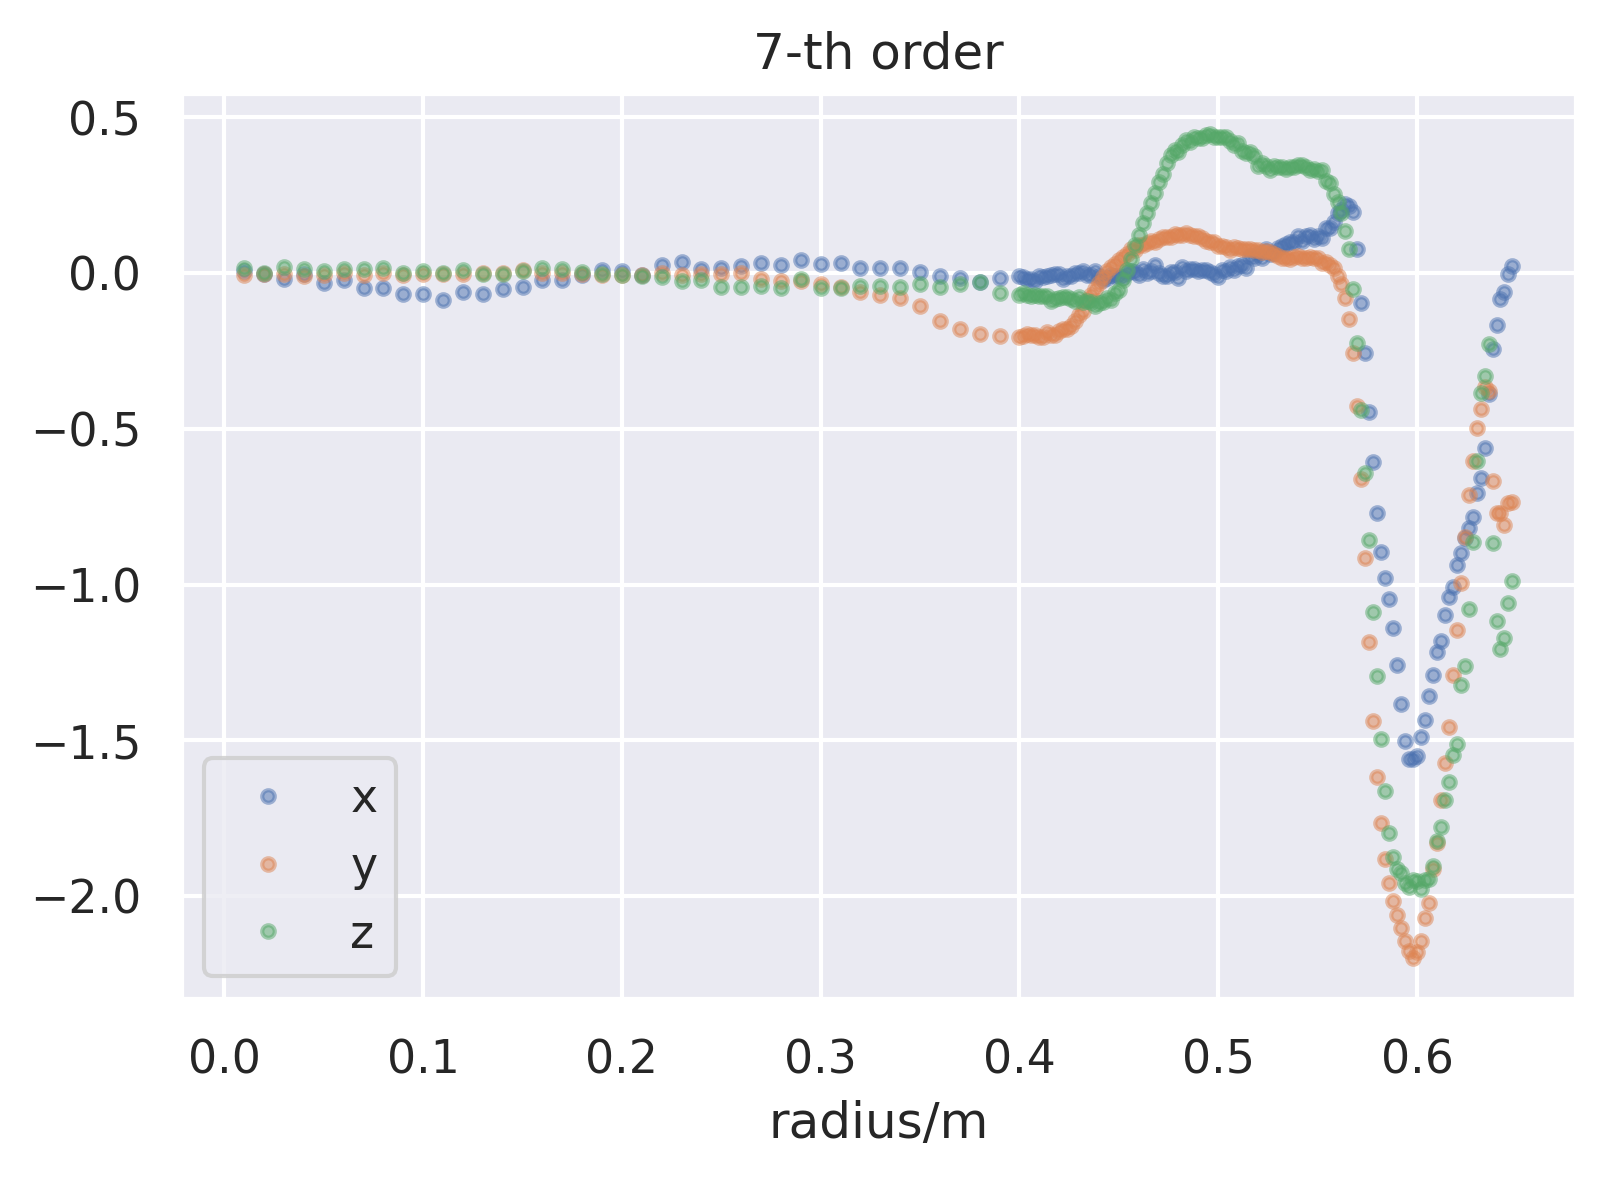

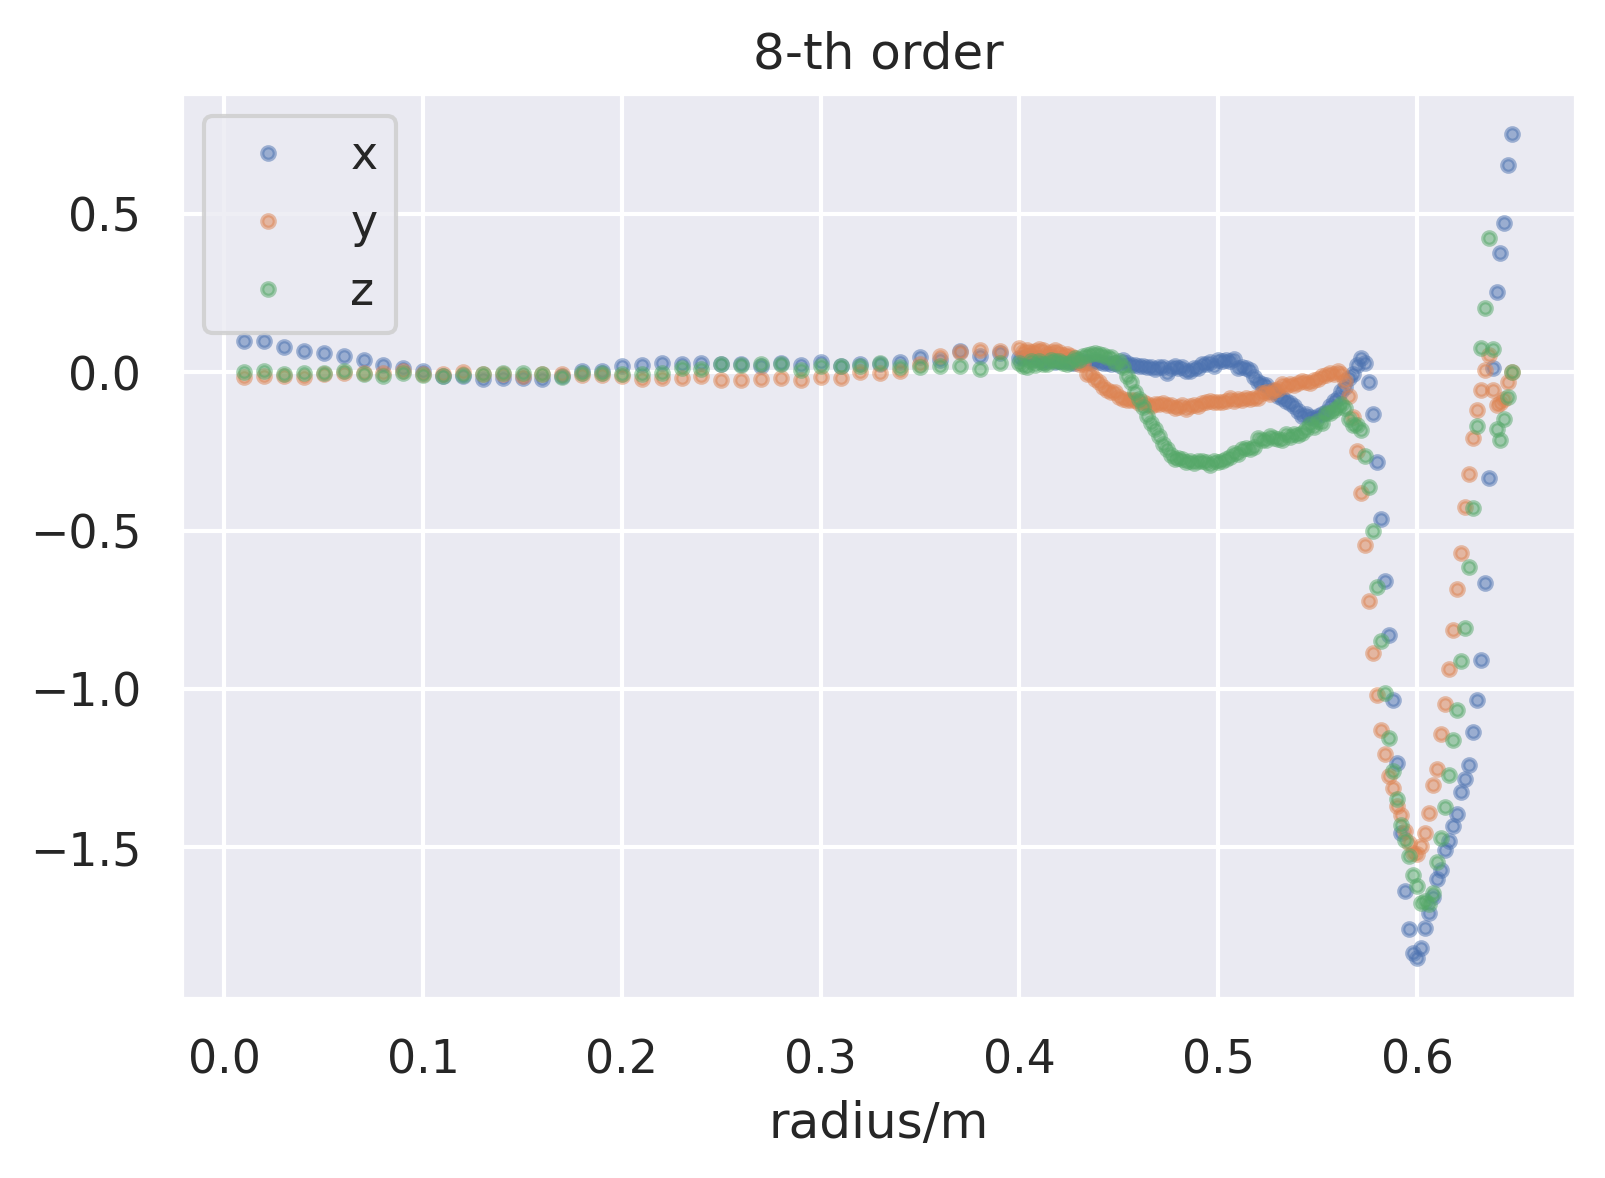

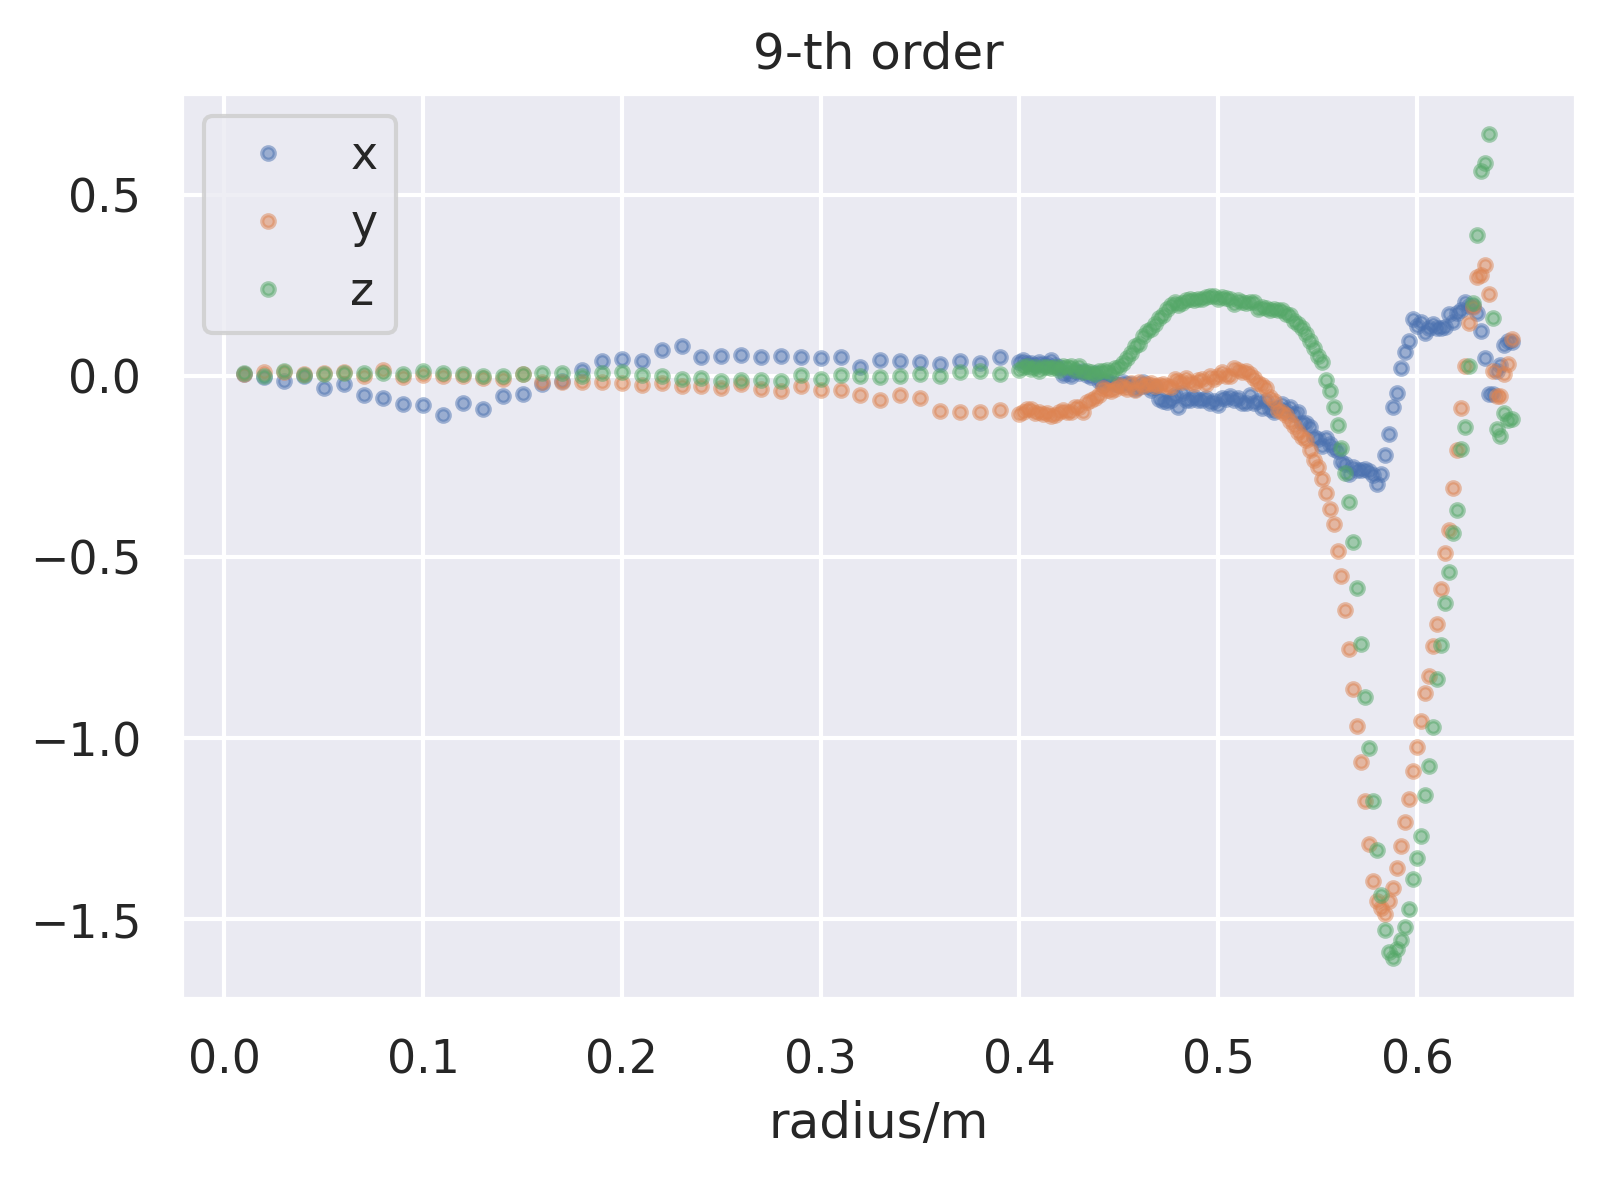

In [38]:
import seaborn as sns
sns.set_theme()
for i in np.arange(1,coeff1[:,0].shape[0]):
    plt.figure(num=i, dpi=300)
    plt.plot(rd1, coeff1[i],'.', label='x', linewidth=1, alpha=0.5)
    plt.plot(rd2, coeff2[i],'.', label='y', linewidth=1, alpha=0.5)
    plt.plot(rd3, coeff3[i],'.', label='z', linewidth=1, alpha=0.5)
    plt.xlabel('radius/m')
    plt.legend()
    plt.title(f'{i-1}-th order')

In [42]:
h = tables.open_file('../coeff_pe_1t_2.0MeV_dns_single_x/file_0.100+x.h5')
h.root 

/ (RootGroup) ''
  children := ['coeff10' (Array), 'coeff11' (Array), 'coeff12' (Array), 'coeff13' (Array), 'coeff14' (Array), 'coeff15' (Array), 'coeff16' (Array), 'coeff17' (Array), 'coeff18' (Array), 'coeff19' (Array), 'coeff2' (Array), 'coeff20' (Array), 'coeff21' (Array), 'coeff22' (Array), 'coeff23' (Array), 'coeff24' (Array), 'coeff3' (Array), 'coeff4' (Array), 'coeff5' (Array), 'coeff6' (Array), 'coeff7' (Array), 'coeff8' (Array), 'coeff9' (Array), 'mean10' (Array), 'mean11' (Array), 'mean12' (Array), 'mean13' (Array), 'mean14' (Array), 'mean15' (Array), 'mean16' (Array), 'mean17' (Array), 'mean18' (Array), 'mean19' (Array), 'mean2' (Array), 'mean20' (Array), 'mean21' (Array), 'mean22' (Array), 'mean23' (Array), 'mean24' (Array), 'mean3' (Array), 'mean4' (Array), 'mean5' (Array), 'mean6' (Array), 'mean7' (Array), 'mean8' (Array), 'mean9' (Array), 'predict10' (Array), 'predict11' (Array), 'predict12' (Array), 'predict13' (Array), 'predict14' (Array), 'predict15' (Array), 'predic

In [ ]:
## gather the data
path = '../coeff_pe_1t_2.0MeV_dns_single_x/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.65, 0.002)))

order = 15
coeff_pe = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    k = LoadDataPE(path, str_radius, order)
    rd.append(np.array(radius))
    coeff_pe = np.hstack((coeff_pe, k))

coeff_pe = np.reshape(coeff_pe,(-1,np.size(ra)),order='F')

print(coeff_pe[:,0].shape)

for i in np.arange(np.size(coeff_pe[:,0])):
    plt.figure(dpi=150)
    data = np.nan_to_num(coeff_pe[i,:])
    x = ra/0.65
    plt.plot(x, data,'.')
    for j_index, j in enumerate(data):
        if((np.abs(data[j_index])>0.03) & (np.sum(np.abs(data[0:j_index])>0.03)==0)):
            if(j_index>0):
                break
    if (j_index != np.size(data)-1):
        for k in np.arange(j_index, 0, -1):
            if((np.abs(data[k])<0.02)):
            #if((np.abs(data[k])<0.015) & (np.sum(np.abs(data[0:k])>0.02)==0)):
                plt.axvline(x[k-1],color='red')
                break
    # 1-st diff 
    # plt.plot(x[0:-1],np.diff(data)/np.diff(x)/1e2)
    coeff = np.zeros_like(x)
    if (j_index == np.size(data)-1):
        k=1
    x1 = x[0:k-1]
    
    error = np.zeros(np.size(np.arange(k+10 ,np.size(data)-10,1)))
    for k2_index, k2 in enumerate(np.arange(k+10,np.size(data)-10,1)):
        x2 = x[k-1:k2]
        a2 = data[k-1:k2]
        
        x3 = x[k2::]
        a3 = data[k2::]
    
        if(i%2==1):
            popt2, pcov = curve_fit(odd_func, x2, a2)
            output2 = odd_func(x2, *popt2)
        else:
            popt2, pcov = curve_fit(even_func, x2, a2)
            output2 = even_func(x2, *popt2)
            
        if(i%2==1):
            popt3, pcov = curve_fit(odd_func, x3, a3)
            output3 = odd_func(x3, *popt3)
        else:
            popt3, pcov = curve_fit(even_func, x3, a3)
            output3 = even_func(x3, *popt3)
            
        #print(output2, output3)
        #error[k2_index] = np.sum((np.exp(output2) - np.exp(a2))**2) +  np.sum((np.exp(output3) - np.exp(a3))**2)
        #error[k2_index] = np.sum((output2 - a2)**2) +  np.sum((output3 - a3)**2)
        error[k2_index] = np.sum((output2 - a2)**2/((x2-0.8)**2+0.0001)) +  np.sum((output3 - a3)**2/((x3-0.8)**2+0.0001))
    
    min_index = np.where(error == np.min(error))
    k2 = min_index[0][0]
    print(k2)
    x2 = x[k-1:k2]
    a2 = data[k-1:k2]

    x3 = x[k2::]
    a3 = data[k2::]

    if(i%2==1):
        popt2, pcov = curve_fit(odd_func, x2, a2)
        output2 = odd_func(x2, *popt2)
    else:
        popt2, pcov = curve_fit(even_func, x2, a2)
        output2 = even_func(x2, *popt2)

    if(i%2==1):
        popt3, pcov = curve_fit(odd_func, x3, a3)
        output3 = odd_func(x3, *popt3)
    else:
        popt3, pcov = curve_fit(even_func, x3, a3)
        output3 = even_func(x3, *popt3)
        
    plt.plot(x2, output2)
    plt.plot(x3, output3)
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw'])
    plt.show()

In [79]:
ra = np.arange(+0.651, 0.01, -0.01)
for i in np.arange(np.size(coeff_time[:,0])):
    
    # segmented
    bd_1 = 0.80
    bd_2l = 0.50 
    bd_2r = 0.80
    bd_3 = 0.7
    
    fit_max = 5
    data = np.nan_to_num(coeff_time[i,:])
    x = ra/0.65


    index1 = (x<=bd_1) & (x>=-bd_1) & (x!=0)

    if(i%2==1):
        popt1, pcov = curve_fit(odd_func, x[index1], data[index1])
        output1 = odd_func(x[index1], *popt1)
    else:
        popt1, pcov = curve_fit(even_func, x[index1], data[index1])
        output1 = even_func(x[index1], *popt1)

    index2 = (np.abs(x)<=bd_2r) & (np.abs(x)>=bd_2l)
    if(i%2==1):
        popt2, pcov = curve_fit(odd_func, x[index2], data[index2])
        output2 = odd_func(x[index2], *popt2)
        #plt.plot(x[index1], odd_func(x[index1], *popt), 'r-')
    else:
        popt2, pcov = curve_fit(even_func, x[index2], data[index2])
        #plt.plot(x[index1], even_func(x[index1], *popt), 'r-')
        output2 = even_func(x[index2], *popt2)

    index3 = (x >= bd_3) | (x <= - bd_3)
    if(i%2==1):
        popt3, pcov = curve_fit(odd_func, x[index3], data[index3])
        output3 = odd_func(x[index3], *popt3)
    else:
        popt3, pcov = curve_fit(even_func, x[index3], data[index3])
        output3 = even_func(x[index3], *popt3)

    #x_total = np.hstack((x[index1],x[index2],x[index3]))
    #y_total = np.hstack((output1,output2,output3))
    #x_total = np.hstack((x[index1],x[index3]))
    #y_total = np.hstack((output1,output3))
    plt.figure(dpi=150)
    plt.plot(x, data,'.')
    #index = np.argsort(x_total)
    plt.plot(x[index1],output1)
    plt.plot(x[index3][x[index3]>0],output3[x[index3]>0], color='g')
    plt.plot(x[index3][x[index3]<0],output3[x[index3]<0], color='g') 
    #plt.plot(x_total[index],y_total[index])
    #plt.text(0,0.5,r'fit: z^1=%2.3f, z^3=%2.3f, z^5=%2.3f, z^7=%2.3f, z^9=%2.3f' % tuple(popt))
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit_inner', 'fit_outer'])
    plt.show()

NameError: name 'coeff_time' is not defined

In [ ]:
## gather the data
path = '../coeff_pe_1t_2.0MeV_dns_Lasso_els5/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.65, 0.002)))

order = 15
coeff_pe = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    k = LoadDataPE(path, str_radius, order)
    rd.append(np.array(radius))
    coeff_pe = np.hstack((coeff_pe, k))

coeff_pe = np.reshape(coeff_pe,(-1,np.size(ra)),order='F')

print(coeff_pe[:,0].shape)
from scipy.signal import savgol_filter

for i in np.arange(np.size(coeff_pe[:,0])):
    plt.figure(dpi=150)
    data = np.nan_to_num(coeff_pe[i,:])
    x = ra/0.65
    yhat = savgol_filter(data, 9, 7)
    plt.plot(x, yhat,'.')
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw'])
    plt.show()

In [51]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
print(z)

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]


(15,)


NameError: name 'x0' is not defined

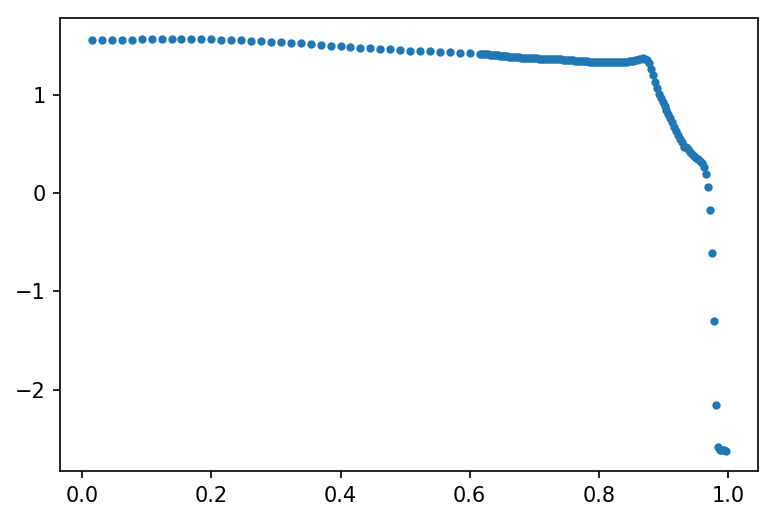

In [80]:
from scipy.optimize import minimize
def odd_func_poly(theta, x):
    size = np.size(theta)
    pw = np.arange(1,2*size-1,2)
    return np.sum(theta*(x**pw))

# fit even order, even order is 0
def even_func_poly(theta, x):
    size = np.size(theta)
    pw = np.arange(0,2*(size-1),2)
    return np.sum(theta*(x**pw))

def odd_func_Legendre(theta, x):
    size = np.size(theta)
    s = 0
    for i in np.arange(1,2*size-1,2):
        k = np.zeros(2*size)
        k[i] = 1
        X = np.polynomial.legendre.legval(x, k)
        s = s + np.sum(X*theta)
    return s

# fit even order, even order is 0
def even_func_Legendre(theta, x):
    size = np.size(theta)
    s = 0
    for i in np.arange(0,2*(size-1),2):
        k = np.zeros(2*size)
        k[i] = 1
        X = np.polynomial.legendre.legval(x, k)
        s = s + np.sum(X*theta)
    return s

## gather the data
path = '../coeff_pe_1t_2.0MeV_dns_Lasso_els4/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.65, 0.002)))

order = 15
coeff_pe = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    k = LoadDataPE(path, str_radius, order)
    rd.append(np.array(radius))
    coeff_pe = np.hstack((coeff_pe, k))

coeff_pe = np.reshape(coeff_pe,(-1,np.size(ra)),order='F')

print(coeff_pe[:,0].shape)

for i in np.arange(np.size(coeff_pe[:,0])):
    plt.figure(dpi=150)
    data = np.nan_to_num(coeff_pe[i,:])
    x = ra/0.65
    plt.plot(x, data,'.')
    for j_index, j in enumerate(data):
        if((np.abs(data[j_index])>0.03) & (np.sum(np.abs(data[0:j_index])>0.03)==0)):
            if(j_index>0):
                break
    if (j_index != np.size(data)-1):
        for k in np.arange(j_index, 0, -1):
            if((np.abs(data[k])<0.02)):
            #if((np.abs(data[k])<0.015) & (np.sum(np.abs(data[0:k])>0.02)==0)):
                plt.axvline(x[k-1],color='red')
                break
    # 1-st diff 
    # plt.plot(x[0:-1],np.diff(data)/np.diff(x)/1e2)
    coeff = np.zeros_like(x)
    if (j_index == np.size(data)-1):
        k=1
    x1 = x[0:k-1]
    
    error = np.zeros(np.size(np.arange(k+10 ,np.size(data)-10,1)))
    for k2_index, k2 in enumerate(np.arange(k+10,np.size(data)-10,1)):
        x2 = x[k-1:k2]
        a2 = data[k-1:k2]
        
        x3 = x[k2::]
        a3 = data[k2::]
        
        theta0 = np.zeros(10)
        result = minimize(odd_func_poly, x0, bounds = ((None, None), (10,100)),method='SLSQP', args = (time))
        z2 = np.polynomial.legendre.legfit(x2, a2, 10)
        z3 = np.polynomial.legendre.legfit(x3, a3, 10)
        print(z2)
        if(i%2==1):
            z2[1::2] = 0
            z3[1::2] = 0
        else:
            z2[0::2] = 0
            z3[0::2] = 0

        '''
        if(i%2==1):
            z[0::2] = 0
        else:
            z[1::2] = 0
        #'''

        #output2 = np.polyval(z2, x2)
        #output3 = np.polyval(z3, x3)
        
        output2 = np.polynomial.legendre.legval(x2, z2)
        output3 = np.polynomial.legendre.legval(x3, z3)
        #print(output2.shape, output3.shape)
        #error[k2_index] = np.sum((output2 - a2)**2) +  np.sum((output3 - a3)**2)
        error[k2_index] = np.sum((output2 - a2)**2/((x2-0.8)**2+0.0001)) +  np.sum((output3 - a3)**2/((x3-0.8)**2+0.0001))

    print(error)
    min_index = np.where(error == np.min(error))
    k2 = min_index[0][0]
    print(k2)
    x2 = x[k-1:k2]
    a2 = data[k-1:k2]
    
    x3 = x[k2::]
    a3 = data[k2::]
        
    z2 = np.polynomial.legendre.legfit(x2, a2, 10)
    z3 = np.polynomial.legendre.legfit(x3, a3, 10)

    if(i%2==1):
        z2[1::2] = 0
        z3[1::2] = 0
    else:
        z2[0::2] = 0
        z3[0::2] = 0

    '''
    if(i%2==1):
        z[0::2] = 0
    else:
        z[1::2] = 0
    #'''

    #output2 = np.polyval(z2, x2)
    #output3 = np.polyval(z3, x3)

    output2 = np.polynomial.legendre.legval(x2, z2)
    output3 = np.polynomial.legendre.legval(x3, z3)
        
    plt.plot(x2, output2)
    plt.plot(x3, output3)
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw'])
    plt.show()

In [81]:
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 3)

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

In [115]:
h = tables.open_file('../coeff_pe_1t_2.0MeV_dns_Lasso_els6/file_0.100.h5')
print(h.root.coeff5[:])

[ 1.56725467e+00  2.37929035e-01  4.39497701e-02  1.47958041e-03
 -4.83709658e-03]


In [5]:
## gather the data
path = '../coeff_pe_1t_point_10_track_30/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.65, 0.002)))

order = 15
coeff_pe = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    try:
        k = LoadDataPE(path, str_radius, order)
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, k))
    except:
        print('error: %.3f' % radius)


coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')

print(coeff_pe[:,0].shape)

for i in np.arange(np.size(coeff_pe[:,0])):
    plt.figure(dpi=150)
    
    # segmented
    bd_1 = 0.85
    bd_2l = 0.50 
    bd_2r = 0.80
    bd_3 = 0.83
    
    fit_max = 5
    data = np.nan_to_num(coeff_pe[i,:])
    x = ra/0.65
    plt.plot(x, data,'.')

    index1 = (x<=bd_1) & (x>=-bd_1) & (x!=0)

    if(i%2==1):
        popt1, pcov = curve_fit(odd_func, x[index1], data[index1])
        output1 = odd_func(x[index1], *popt1)
    else:
        popt1, pcov = curve_fit(even_func, x[index1], data[index1])
        output1 = even_func(x[index1], *popt1)

    index2 = (np.abs(x)<=bd_2r) & (np.abs(x)>=bd_2l)
    if(i%2==1):
        popt2, pcov = curve_fit(odd_func, x[index2], data[index2])
        output2 = odd_func(x[index2], *popt2)
        #plt.plot(x[index1], odd_func(x[index1], *popt), 'r-')
    else:
        popt2, pcov = curve_fit(even_func, x[index2], data[index2])
        #plt.plot(x[index1], even_func(x[index1], *popt), 'r-')
        output2 = even_func(x[index2], *popt2)
    
    index3 = (x >= bd_3) | (x <= - bd_3)
    if(i%2==1):
        popt3, pcov = curve_fit(odd_func, x[index3], data[index3])
        output3 = odd_func(x[index3], *popt3)
    else:
        popt3, pcov = curve_fit(even_func, x[index3], data[index3])
        output3 = even_func(x[index3], *popt3)

    #x_total = np.hstack((x[index1],x[index2],x[index3]))
    #y_total = np.hstack((output1,output2,output3))
    #x_total = np.hstack((x[index1],x[index3]))
    #y_total = np.hstack((output1,output3))
    #index = np.argsort(x_total)

    plt.plot(x[index1],output1)
    plt.plot(x[index3][x[index3]>0],output3[x[index3]>0], color='g')
    plt.plot(x[index3][x[index3]<0],output3[x[index3]<0], color='g')  
    #plt.text(0,0.5,r'fit: z^1=%2.3f, z^3=%2.3f, z^5=%2.3f, z^7=%2.3f, z^9=%2.3f' % tuple(popt))
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit_inner','fit_outer'])
    plt.savefig('./fig_view/PE_%d-th Legendre coeff.pdf' % i)
    plt.show()

error: 0.010
error: 0.020
error: 0.030
error: 0.040
error: 0.050
error: 0.060
error: 0.070
error: 0.080
error: 0.090
error: 0.100
error: 0.110
error: 0.120
error: 0.130
error: 0.140
error: 0.150
error: 0.160
error: 0.170
error: 0.180
error: 0.190
error: 0.200
error: 0.210
error: 0.220
error: 0.230
error: 0.240
error: 0.250
error: 0.260
error: 0.270
error: 0.280
error: 0.290
error: 0.300
error: 0.310
error: 0.320
error: 0.330
error: 0.340
error: 0.350
error: 0.360
error: 0.370
error: 0.380
error: 0.390
error: 0.400
error: 0.402
error: 0.404
error: 0.406
error: 0.408
error: 0.410
error: 0.412
error: 0.414
error: 0.416
error: 0.418
error: 0.420
error: 0.422
error: 0.424
error: 0.426
error: 0.428
error: 0.430
error: 0.432
error: 0.434
error: 0.436
error: 0.438
error: 0.440
error: 0.442
error: 0.444
error: 0.446
error: 0.448
error: 0.450
error: 0.452
error: 0.454
error: 0.456
error: 0.458
error: 0.460
error: 0.462
error: 0.464
error: 0.466
error: 0.468
error: 0.470
error: 0.472
error: 0.474

ValueError: cannot reshape array of size 0 into shape (0)